# <font color="red"> ISAA PROJECT- </font> 18BIT0226

## MODEL - ADABOOST

***GRADIENT BOOSTING***  

<div style="background-color:rgb(253, 255, 135); "> Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.</div>

## <font color="blue"> 3/3 DATASET </font> - WINDOWS 7

******

### IMPORTING THE LIBRARIES

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [3]:
data=pd.read_csv("Train_Test_Windows_dataset/Train_Test_Windows_7.csv")

In [4]:
data.head()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,0,85.52083333,0,0,0,13.125,86.66666667,14.47916667,59.35463175,0.520833333,...,251,12070912,0.466834182,1943322624,5849088,1.200430755,27090944,0,1,ddos
1,0,73.85416667,0,0,0,24.6875,73.33333333,26.14583333,52.19953716,0.208333333,...,267,12025856,0.59999468,1933844480,5849088,7.599932614,27181056,0,1,ddos
2,0,85.83333333,0,0,0,13.125,86.66666667,14.16666667,59.06549008,0.208333333,...,256,11960320,0.399992032,1937002496,5849088,0,27185152,0,1,ddos
3,0,88.54166667,0,0,0,10.72916667,86.66666667,11.45833333,62.00056255,0.104166667,...,262,12066816,0.400003629,1930117120,5849088,0,27185152,0,1,ddos
4,0,83.54166667,0,0.104166667,0,14.79166667,80,16.45833333,76.73258954,0.3125,...,240,118784,4.666621432,1960501248,5849088,74.06594872,27201536,0,1,ddos


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15980 entries, 0 to 15979
Columns: 134 entries, Processor(_Total) DPC Rate to type
dtypes: float64(1), int64(65), object(68)
memory usage: 16.3+ MB


In [6]:
data.describe()

,Processor(_Total) DPC Rate,Process(_Total) Pool Paged Bytes,Process(_Total) Working Set - Private,Process(_Total) Working Set Peak,Process(_Total) Page File Bytes,Process(_Total) Virtual Bytes Peak,Process(_Total) Page File Bytes Peak,Process(_Total) Private Bytes,Process(_Total) Elapsed Time,Process(_Total) Virtual Bytes,...,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,label
count,15980.000000,1.598000e+04,1.598000e+04,1.598000e+04,1.598000e+04,1.598000e+04,1.598000e+04,1.598000e+04,15980.0,1.598000e+04,...,15980.000000,15980.000000,15980.000000,1.598000e+04,15980.000000,1.598000e+04,1.598000e+04,1.598000e+04,1.598000e+04,15980.000000
mean,26.568899,8.009329e+06,8.079906e+08,2.128739e+09,1.843358e+09,8.001785e+09,2.254187e+09,1.843358e+09,0.0,6.732024e+09,...,65995.537171,59961.351940,73.177469,3.356013e+07,182.137797,5.924840e+06,2.282441e+09,5.849584e+06,2.127352e+07,0.374218
std,32.308594,1.450130e+06,4.431660e+08,6.438804e+08,6.656143e+08,1.855786e+09,7.434107e+08,6.656143e+08,0.0,1.457582e+09,...,10057.666135,10632.463905,18.306345,2.595636e+03,249.953959,1.191230e+07,6.877373e+08,1.103263e+04,1.669906e+07,0.483935
min,0.000000,4.709304e+06,1.286676e+08,5.643182e+08,3.188163e+08,3.122024e+09,3.622339e+08,3.188163e+08,0.0,2.927849e+09,...,57079.000000,46214.000000,14.447395,3.355563e+07,0.000000,4.096000e+03,6.968402e+08,5.832704e+06,4.759552e+06,0.000000
25%,0.000000,7.641140e+06,7.229112e+08,1.985806e+09,1.650918e+09,7.662776e+09,1.968916e+09,1.650918e+09,0.0,6.628295e+09,...,59124.000000,53266.000000,56.558473,3.355732e+07,11.000000,5.324800e+04,2.208207e+09,5.849088e+06,1.107558e+07,0.000000
50%,7.000000,7.928696e+06,7.814451e+08,2.028650e+09,2.028859e+09,8.073679e+09,2.501999e+09,2.028859e+09,0.0,6.844084e+09,...,61668.500000,57511.500000,81.808854,3.356093e+07,72.500000,1.249280e+05,2.402339e+09,5.849088e+06,1.277542e+07,0.000000
75%,52.000000,8.691640e+06,9.079747e+08,2.438959e+09,2.169245e+09,8.466223e+09,2.685650e+09,2.169245e+09,0.0,7.244209e+09,...,67998.500000,61387.500000,87.893793,3.356214e+07,276.000000,5.309440e+06,2.578957e+09,5.849088e+06,2.979430e+07,1.000000
max,326.000000,2.077674e+07,2.628772e+09,4.175995e+09,4.706992e+09,1.556637e+10,5.019906e+09,4.706992e+09,0.0,1.367736e+10,...,142256.000000,123371.000000,92.337042,3.356470e+07,2141.000000,2.862981e+08,5.168996e+09,5.992448e+06,2.280530e+08,1.000000


In [7]:
data.shape

(15980, 134)

In [8]:
# So out target class contains 8 types of attacks. 
data['type'].value_counts()

normal        10000
ddos           2134
backdoor       1779
injection       998
password        757
scanning        226
ransomware       82
xss               4
Name: type, dtype: int64

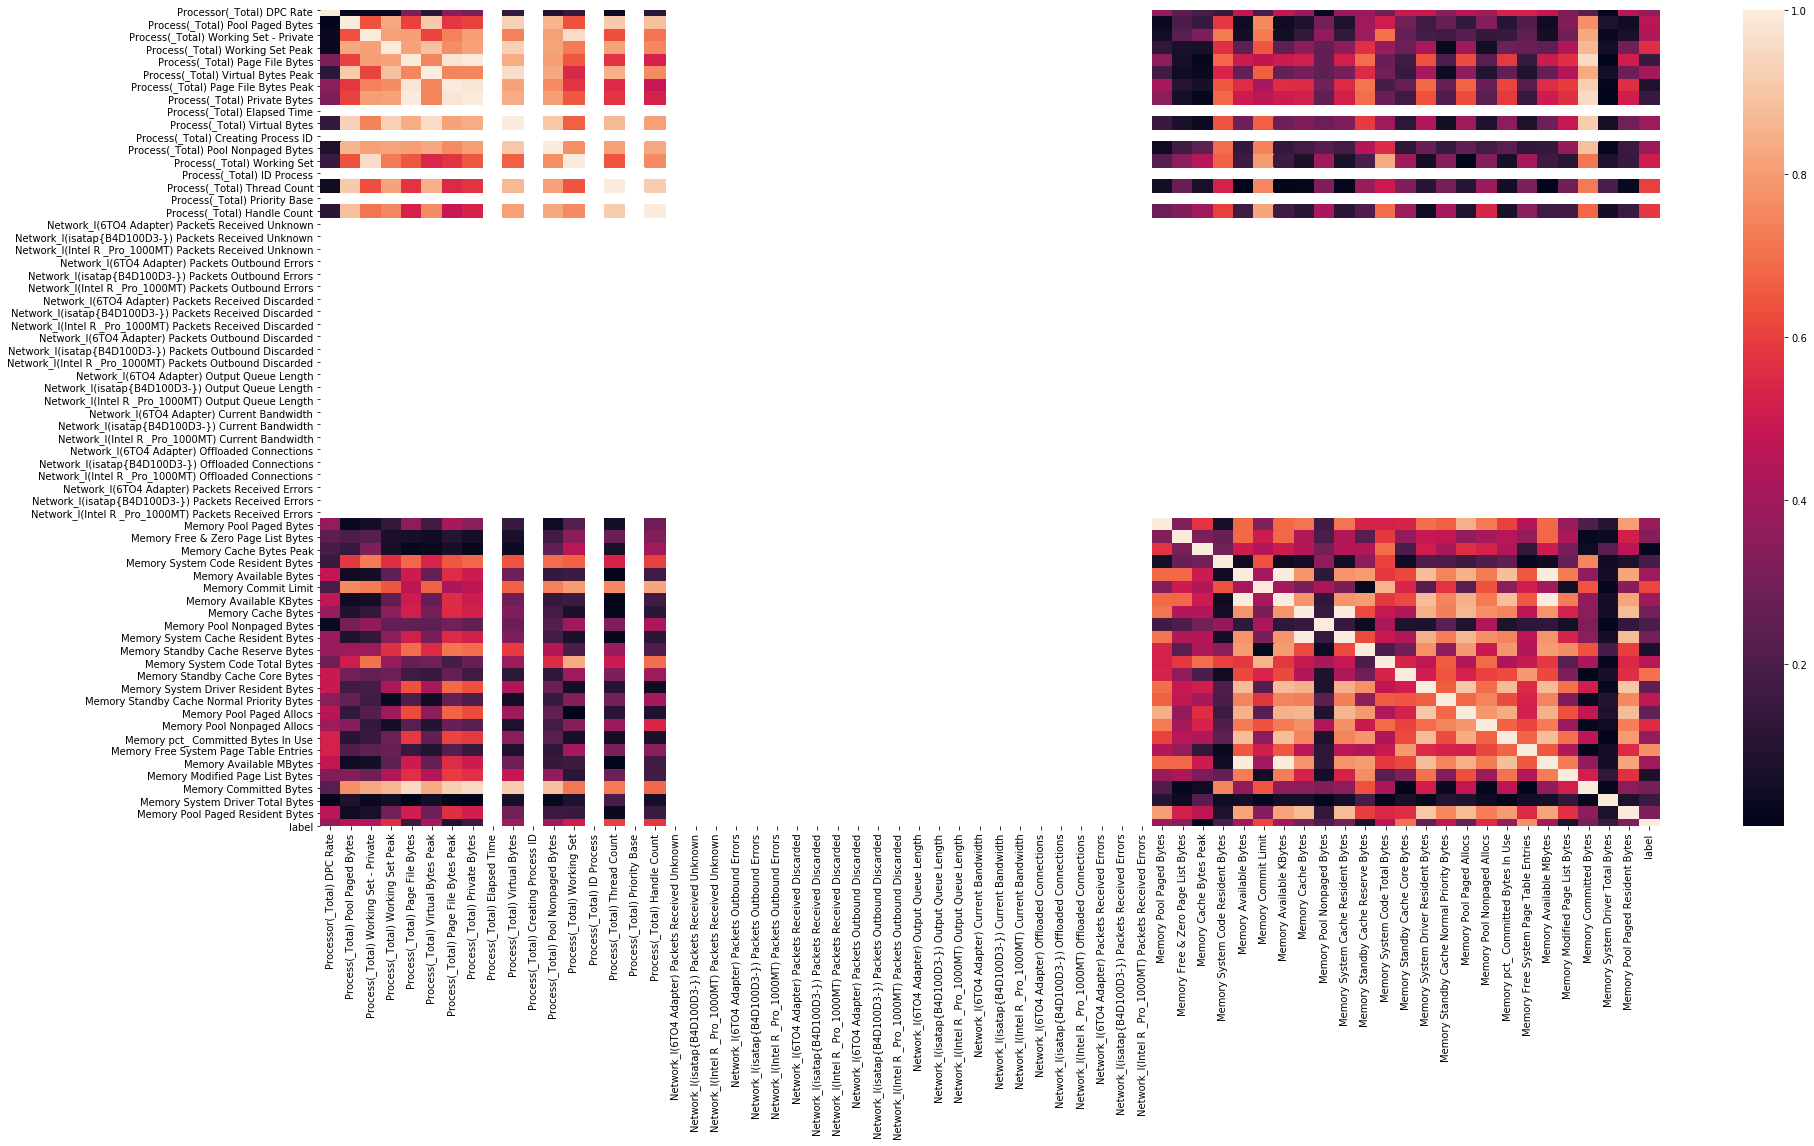

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr().apply(abs))

In [10]:
data.isnull().sum()

Processor(_Total) DPC Rate               0
Processor(_Total) pct_ Idle Time         0
Processor(_Total) pct_ C3 Time           0
Processor(_Total) pct_ Interrupt Time    0
Processor(_Total) pct_ C2 Time           0
                                        ..
Memory Pages Input sec                   0
Memory Pool Paged Resident Bytes         0
Memory Write Copies sec                  0
label                                    0
type                                     0
Length: 134, dtype: int64

In [11]:
data.head()

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,0,85.52083333,0,0,0,13.125,86.66666667,14.47916667,59.35463175,0.520833333,...,251,12070912,0.466834182,1943322624,5849088,1.200430755,27090944,0,1,ddos
1,0,73.85416667,0,0,0,24.6875,73.33333333,26.14583333,52.19953716,0.208333333,...,267,12025856,0.59999468,1933844480,5849088,7.599932614,27181056,0,1,ddos
2,0,85.83333333,0,0,0,13.125,86.66666667,14.16666667,59.06549008,0.208333333,...,256,11960320,0.399992032,1937002496,5849088,0,27185152,0,1,ddos
3,0,88.54166667,0,0,0,10.72916667,86.66666667,11.45833333,62.00056255,0.104166667,...,262,12066816,0.400003629,1930117120,5849088,0,27185152,0,1,ddos
4,0,83.54166667,0,0.104166667,0,14.79166667,80,16.45833333,76.73258954,0.3125,...,240,118784,4.666621432,1960501248,5849088,74.06594872,27201536,0,1,ddos


In [12]:
data['Processor(_Total) pct_ C3 Time'].value_counts()

0    15973
         7
Name: Processor(_Total) pct_ C3 Time, dtype: int64

##### There are some colums in the data which have empty value therefore the data type of those columns is object, so will convert the empty value to NAN and remove all the nan.

In [13]:
data=data.apply(lambda x: x.apply (lambda x: np.nan if x==' ' else x))

In [14]:
n=data.isnull().sum()
n[n!=0]

Processor(_Total) pct_ Idle Time         7
Processor(_Total) pct_ C3 Time           7
Processor(_Total) pct_ Interrupt Time    7
Processor(_Total) pct_ C2 Time           7
Processor(_Total) pct_ User Time         7
                                        ..
Memory Transition Faults sec             7
Memory Page Writes sec                   7
Memory Cache Faults sec                  7
Memory Pages Input sec                   7
Memory Write Copies sec                  7
Length: 67, dtype: int64

In [15]:
data=data.dropna()
data

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ C3 Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ C2 Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,...,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label,type
0,0,85.52083333,0,0,0,13.125,86.66666667,14.47916667,59.35463175,0.520833333,...,251,12070912,0.466834182,1943322624,5849088,1.200430755,27090944,0,1,ddos
1,0,73.85416667,0,0,0,24.6875,73.33333333,26.14583333,52.19953716,0.208333333,...,267,12025856,0.59999468,1933844480,5849088,7.599932614,27181056,0,1,ddos
2,0,85.83333333,0,0,0,13.125,86.66666667,14.16666667,59.06549008,0.208333333,...,256,11960320,0.399992032,1937002496,5849088,0,27185152,0,1,ddos
3,0,88.54166667,0,0,0,10.72916667,86.66666667,11.45833333,62.00056255,0.104166667,...,262,12066816,0.400003629,1930117120,5849088,0,27185152,0,1,ddos
4,0,83.54166667,0,0.104166667,0,14.79166667,80,16.45833333,76.73258954,0.3125,...,240,118784,4.666621432,1960501248,5849088,74.06594872,27201536,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,0,99.375,0,0.104166667,0,0.208333333,93.33333333,0.625,69.39599169,0,...,512,28692480,0,989159424,5832704,0,33837056,0,1,scanning
15976,0,98.95833333,0,0,0,0.3125,93.33333333,1.041666667,69.06618505,0.104166667,...,510,28655616,0,991559680,5832704,0,33837056,0,1,scanning
15977,0,99.58333333,0,0,0,0.208333333,100,0.416666667,69.53555198,0.104166667,...,510,28504064,0,990556160,5832704,0,33837056,0,1,scanning
15978,0,99.16666667,0,0.104166667,0,0.208333333,100,0.833333333,69.13535808,0.104166667,...,509,27869184,0,991739904,5832704,0,33894400,0,1,scanning


In [16]:
useless_col=[]
for i in data.columns:
    if(len(data[i].unique())==1):
        useless_col.append(i)

print("Total useless columns= ",len(useless_col))
data.drop(useless_col,1,inplace=True)

Total useless columns=  54


#### We have found after dropping all the null values that 54 colums contain exactly 1 unique value so we will be dropping these columns.

In [17]:
boolean_col=[]
for i in data.columns:
    if(len(data[i].unique())==2):
        boolean_col.append(i)

print("Total boolean columns= ",len(boolean_col))


Total boolean columns=  2


In [18]:
for i in data.columns:
    if(len(data[i].unique())==2):
        print(data[i].value_counts())


7155712    14043
4370432     1753
Name: Memory System Code Total Bytes, dtype: int64
0    9874
1    5922
Name: label, dtype: int64


In [19]:
data['Memory System Code Total Bytes']=data['Memory System Code Total Bytes'].apply(lambda x: 1 if x==7155712 else 0)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15796 entries, 0 to 15979
Data columns (total 80 columns):
Processor(_Total) DPC Rate                                     15796 non-null int64
Processor(_Total) pct_ Idle Time                               15796 non-null object
Processor(_Total) pct_ Interrupt Time                          15796 non-null object
Processor(_Total) pct_ User Time                               15796 non-null object
Processor(_Total) pct_ C1 Time                                 15796 non-null object
Processor(_Total) pct_ Processor Time                          15796 non-null object
Processor(_Total) C1 Transitions sec                           15796 non-null object
Processor(_Total) pct_ DPC Time                                15796 non-null object
Processor(_Total) pct_ Privileged Time                         15796 non-null object
Processor(_Total) DPCs Queued sec                              15796 non-null object
Processor(_Total) Interrupts sec          

In [21]:
float_col= data.select_dtypes(exclude='int64').drop('type',1).columns
data[float_col]=data[float_col].astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15796 entries, 0 to 15979
Data columns (total 80 columns):
Processor(_Total) DPC Rate                                     15796 non-null int64
Processor(_Total) pct_ Idle Time                               15796 non-null float64
Processor(_Total) pct_ Interrupt Time                          15796 non-null float64
Processor(_Total) pct_ User Time                               15796 non-null float64
Processor(_Total) pct_ C1 Time                                 15796 non-null float64
Processor(_Total) pct_ Processor Time                          15796 non-null float64
Processor(_Total) C1 Transitions sec                           15796 non-null float64
Processor(_Total) pct_ DPC Time                                15796 non-null float64
Processor(_Total) pct_ Privileged Time                         15796 non-null float64
Processor(_Total) DPCs Queued sec                              15796 non-null float64
Processor(_Total) Interrupts sec 

In [23]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# We only have 1 column whose data type is not float or int
type

data["type_Enc"]=LE.fit_transform(data.type)
data.drop(['type'],axis=1,inplace=True)

In [24]:
data['type_Enc'].value_counts()

3    9874
1    2126
0    1753
2     987
4     755
6     225
5      72
7       4
Name: type_Enc, dtype: int64

In [25]:
y=data['type_Enc']
x=data.drop(['type_Enc'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
data_name=data.iloc[:,:-1]
cols = data_name.columns
sc_data = scaler.fit_transform(x)
# turn the result back to a dataframe
data = pd.DataFrame(sc_data, columns = cols)

In [27]:
data

,Processor(_Total) DPC Rate,Processor(_Total) pct_ Idle Time,Processor(_Total) pct_ Interrupt Time,Processor(_Total) pct_ User Time,Processor(_Total) pct_ C1 Time,Processor(_Total) pct_ Processor Time,Processor(_Total) C1 Transitions sec,Processor(_Total) pct_ DPC Time,Processor(_Total) pct_ Privileged Time,Processor(_Total) DPCs Queued sec,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,label
0,-0.824245,0.506327,-0.501267,0.717301,0.660903,-0.506328,-1.223957,0.589495,-1.071132,-1.166423,...,-1.085264,0.283682,0.533680,-0.053911,-0.501595,-0.039203,-1.110656,0.367753,-0.139415,1.291256
1,-0.824245,-0.153966,-0.501267,1.927924,-0.094741,0.153966,-1.228803,-0.143519,-1.064066,-1.163817,...,-1.085264,0.348216,0.529824,-0.053417,-0.515423,-0.039203,-1.108809,0.373267,-0.139415,1.291256
2,-0.824245,0.524014,-0.501267,0.717301,0.660903,-0.524014,-1.224153,-0.143519,-1.092329,-1.166211,...,-1.085264,0.303849,0.524216,-0.054159,-0.510816,-0.039203,-1.111002,0.373518,-0.139415,1.291256
3,-0.824245,0.677296,-0.501267,0.466451,0.660903,-0.677297,-1.222165,-0.387857,-1.113525,-1.166767,...,-1.085264,0.328049,0.533330,-0.054159,-0.520861,-0.039203,-1.111002,0.373518,-0.139415,1.291256
4,-0.824245,0.394313,-0.168912,0.891805,0.283081,-0.394314,-1.212188,0.100819,-1.049935,-1.154454,...,-1.084493,0.239316,-0.489143,-0.038319,-0.476534,-0.039203,-1.089627,0.374520,-0.139415,1.291256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15791,-0.824245,1.290426,-0.168912,-0.635107,1.038724,-1.290426,-1.217157,-0.632195,-1.134722,-1.166896,...,-0.482899,1.336382,1.956098,-0.055644,-1.893603,-1.601009,-1.111002,0.780543,-0.139415,1.291256
15792,-0.824245,1.266844,-0.501267,-0.624200,1.038724,-1.266844,-1.217380,-0.387857,-1.113525,-1.166297,...,-0.482899,1.328315,1.952944,-0.055644,-1.890102,-1.601009,-1.111002,0.780543,-0.139415,1.291256
15793,-0.824245,1.302217,-0.501267,-0.635107,1.416546,-1.302217,-1.217062,-0.387857,-1.148853,-1.167109,...,-0.482899,1.328315,1.939974,-0.055644,-1.891566,-1.601009,-1.111002,0.780543,-0.139415,1.291256
15794,-0.824245,1.278635,-0.168912,-0.635107,1.416546,-1.278635,-1.217333,-0.387857,-1.120591,-1.166639,...,-0.482899,1.324282,1.885643,-0.055644,-1.889839,-1.601009,-1.111002,0.784052,-0.139415,1.291256


## SAMPLING

In [28]:
import imblearn
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ru = RandomUnderSampler()
ro=RandomOverSampler(sampling_strategy='auto',random_state=1)
# Xres, yres = ru.fit_sample(data,y)

Xro,yro=ro.fit_resample(x,y)

# oversample = RandomOverSampler(sampling_strategy=0.75) #75% oversampling
# X_res, y_res= oversample.fit_resample(X_train,y_train)

In [29]:
yro.value_counts()

7    9874
6    9874
5    9874
4    9874
3    9874
2    9874
1    9874
0    9874
Name: type_Enc, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xro,yro, test_size=0.3, random_state=42, stratify=yro)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
import time 
time_start=time.clock()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
time_elapsed=(time.clock()-time_start)
time_elapsed

C:\Users\hriti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


0.5


C:\Users\hriti\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


25.328206199999983

### KFold

In [32]:

model = AdaBoostClassifier(random_state=42)
def evaluate_model(model):
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    return scores

scores = evaluate_model(model)

In [33]:
from numpy import mean
print('Accuracy after k folds= ',mean(scores)*100,'%')

Accuracy after k folds=  49.99638336347198 %


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predictions))

[[2962    0    0    0    0    0    0    0]
 [   0 2962    0    0    0    0    0    0]
 [   0 2962    0    0    0    0    0    0]
 [   0    0    0 2963    0    0    0    0]
 [   0 2962    0    0    0    0    0    0]
 [   0 2962    0    0    0    0    0    0]
 [   0 2963    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2962]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2962
           1       0.20      1.00      0.33      2962
           2       0.00      0.00      0.00      2962
           3       1.00      1.00      1.00      2963
           4       0.00      0.00      0.00      2962
           5       0.00      0.00      0.00      2962
           6       0.00      0.00      0.00      2963
           7       1.00      1.00      1.00      2962

    accuracy                           0.50     23698
   macro avg       0.40      0.50      0.42     23698
weighted avg       0.40      0.50      0.42     23698



C:\Users\hriti\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# plt.figure(figsize=(25,15))
# sns.heatmap(data.corr())

In [41]:
# data1.corr(method="pearson",min_periods=1)

In [42]:
# Pcorr = data.corrwith(y)
# imp_cols = abs(Pcorr[Pcorr>0.1])

In [43]:
# imp_cols            

### HYPER PARAMETER TUNING

In [44]:
params={'n_estimators': [200,300,400],
           'learning_rate': [0.01,0.1,0.15]}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(AdaBoostClassifier(),params,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=200, score=1.000, total=  44.5s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.4s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=1.000, total=  44.0s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=1.000, total=  44.9s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=1.000, total=  44.6s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=1.000, total=  44.6s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=1.000, total= 1.1min
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=1.000, total= 1.1min
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=1.000, total= 1.1min
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=1.000, total= 1.1min
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 52.5min finished


In [47]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [48]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [49]:
grid_predictions = grid.predict(X_test)

In [50]:
print(confusion_matrix(y_test,grid_predictions))

[[2962    0    0    0    0    0    0    0]
 [   0 2962    0    0    0    0    0    0]
 [   0    0 2962    0    0    0    0    0]
 [   0    0    0 2963    0    0    0    0]
 [   0    0    0    0 2962    0    0    0]
 [   0    0    0    0    0 2962    0    0]
 [   0    0    0    0    0    0 2963    0]
 [   0    0    0    0    0    0    0 2962]]


In [51]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2962
           1       1.00      1.00      1.00      2962
           2       1.00      1.00      1.00      2962
           3       1.00      1.00      1.00      2963
           4       1.00      1.00      1.00      2962
           5       1.00      1.00      1.00      2962
           6       1.00      1.00      1.00      2963
           7       1.00      1.00      1.00      2962

    accuracy                           1.00     23698
   macro avg       1.00      1.00      1.00     23698
weighted avg       1.00      1.00      1.00     23698

